In [12]:
from functools import reduce
import joblib
import datetime
import os
import pandas as pd
import numpy as np
import colorama as col 
import yfinance as yf
import mplfinance as fplt
import pandas_datareader.data as web
#import ffn
from matplotlib import pyplot as plt
import warnings
import joblib
import datetime as dt
#import fxcmpy
from tqdm import tqdm
import sys
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
sys.path.append('../') 
import pyttsx3
engine = pyttsx3.init()
from scipy.signal import argrelextrema
#from slack_sdk import WebClient
#_slack_token = joblib.load('TOKENS/_slack_token.dag')
#client = WebClient(token=_slack_token)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import talib
import datetime as dt

warnings.filterwarnings("ignore")

TIK = ['AUD','NZD','GBP','JPY','CHF','CAD','SEK','NOK','ILS','MXN','USD','EUR']
RATE = [0.776,0.721,1.3912,1/105.91,1/0.892,1/1.2681,1/8.2884,1/8.4261,1/3.2385,1/20.1564,1,1.21]
df_ratefx = pd.DataFrame(index=TIK)
df_ratefx['rate'] = RATE

TICKER_LIST = [ 'EUR/USD','USD/JPY','GBP/USD','USD/CHF','EUR/CHF','AUD/USD','USD/CAD','NZD/USD','EUR/GBP','EUR/JPY','GBP/JPY','CHF/JPY','GBP/CHF','EUR/AUD','EUR/CAD','AUD/CAD','AUD/JPY','CAD/JPY','NZD/JPY','GBP/CAD','GBP/NZD','GBP/AUD','AUD/NZD','USD/SEK','EUR/SEK','EUR/NOK','USD/NOK','USD/MXN','AUD/CHF','EUR/NZD','USD/ZAR','ZAR/JPY','NZD/CHF','CAD/CHF','NZD/CAD','USD/CNH',\
              'US30','WHEATF','XAUUSD','XAGUSD']

_period = 'm15'
_period2 = 'H1'
_period3 = 'H4'
#_ticker = x.replace('/','')
_start = '2010-01-01' # start the train there '2010-01-01'
_mid = '2016-06-30' # stop the train and begin the test there '2016-08-31'
_stop = '2017-12-31' # stop the test there. After that, it is kept for oos '2017-12-31'
_last = '2021-04-29' # '2020-12-31'
_nb_bougie_exit = 48888888888888
_trigger_reengage = 0
_trigger_target = 1
_trigger_invers = 0
_trigger_sl = 1
_trigger_rsi = 0
_verbose = 0
_cash_ini = 200000
_target = 0.003
_sl = 0.0015
_exposure = 2
#_rate = df_ratefx.loc[x[4:],'rate']
#_size = _cash_ini / df_ratefx.loc[x[:3],'rate']
_trigger_spread = 0.025
_no_access = 0




_total = 0
_cash_ini = 200000
_cash = _cash_ini
_rate = 1
_flag = 0


_size = 100
_target = 15
_sl = -30
_rsi_high = 65
_rsi_low = 35


In [13]:
def init_base():
  
    """[Première initialisation de la base Live à partir de la base HDD et vérifications d'usage]
    """    
    _t1 = dt.datetime.now()
    print('Début des opérations horodatée à',col.Fore.YELLOW,dt.datetime.now(),col.Style.RESET_ALL)
    
    print('\nINITIALISATION DE LA BASE\n')

    print('Ticker :',col.Fore.YELLOW,x,col.Style.RESET_ALL)

    #df,df_H1,df_H4 = load_hdd()
    df_H4 = load_hdd()
    
    #df = drop_we(df)
    #is_we(df)
    
    #df_H1 = drop_we(df_H1)
    df_H4 = drop_we(df_H4)
    #is_we(df_H1)
    is_we(df_H4)

    #df = make_mid(df)
    
    #df_H1 = make_mid(df_H1)
    df_H4 = make_mid(df_H4)

    #df = reduce_df(df)

    #df_H1 = reduce_df(df_H1)
    df_H4 = reduce_df(df_H4)

    #df, df_H1, df_D1, df_W1 =  make_indicators(df, df_H1)

    engine.say("The job is done")
    engine.runAndWait()

    print('Sauvegarde des Bases')
    #joblib.dump(df_H1,'BASES/'+_ticker+'_'+_period2)
    joblib.dump(df_H4,'BASES/'+_ticker+'_'+_period3)
    #joblib.dump(df,'BASES/'+_ticker+'_'+_period)
    #joblib.dump(df_D1,'BASES/'+_ticker+'_D1')
    #joblib.dump(df_W1,'BASES/'+_ticker+'_W1')
    print('Bases sauvegardées')

    engine.say("All the bases are saved")
    engine.runAndWait()

    '''print('\ndf :',df,'\n')
    print('\ndf_H1 :',df_H1,'\n')
    print('\ndf_H4 :',df_H4,'\n')'''
    #print('\ndf_D1 :',df_D1,'\n')
    #print('\ndf_W1 :',df_W1,'\n') 

    #print('\nAnalyse des nan dans df :')
    #check_nan(df)

    #print('\nAnalyse des inf :')
    #check_inf(df)

    #print('\n Analyse des bougies manquantes :')
    #missing_candle_hdd(df)

    _t2 = dt.datetime.now()
    print('Fin des opérations horodatée à',col.Fore.YELLOW,dt.datetime.now(),col.Style.RESET_ALL)
    print('Executé en :',(_t2 - _t1))
    #return(df,df_H1,df_H4)
    return(df_H4)

In [14]:
def bak_peak_detect(price,low,high,order=3):
    #print('price.shape',price.shape)
    max_idx = list(argrelextrema(high,np.greater,order=order)[0])
    #print('max_idx shape',len(max_idx))
    min_idx = list(argrelextrema(low,np.less,order=order)[0])
    #print('min_idx shape',len(min_idx))
    #idx = max_idx + min_idx + [len(price)-1]
    idx = max_idx + min_idx 
    #print('idx shape',len(idx))
    idx.sort()
    _current_idx = idx[-5:]
    #print('current_idx shape',len(current_idx))
    
    
    _start = min(_current_idx)
    _end = max(_current_idx)
    _current_pat = price[_current_idx]
    return _current_idx,_current_pat,_start,_end  


def peak_detect(high,low,order=10):
    #print('price.shape',price.shape)
    max_idx = list(argrelextrema(high,np.greater,order=order)[0])
    #print('max_idx shape',len(max_idx))
    min_idx = list(argrelextrema(low,np.less,order=order)[0])
    #print('min_idx shape',len(min_idx))
    idx = max_idx + min_idx
    #print('idx shape',len(idx))
    idx.sort()
    CURRENT = []
    for i in idx:
        if i in max_idx:
            CURRENT.append(high[i])
        else:
            CURRENT.append(low[i])


    if idx[-1] in max_idx:
        CURRENT.append(low[len(high)-1])

    else:
        CURRENT.append(high[len(low)-1])
    
    CURRENT = CURRENT[-5:]
    _current_idx = idx[-4:] + [len(high)-1]
    #print('current_idx shape',len(current_idx))
    _start = min(_current_idx)
    _end = max(_current_idx)
    return _current_idx,CURRENT,_start,_end 

In [15]:
def is_gartley(moves,err_allowed):  
    XA=moves[0]
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
   
    AB_range = np.array([0.618 - err_allowed,0.618 + err_allowed])*abs(XA)
    BC_range = np.array([0.382 - err_allowed,0.886 + err_allowed])*abs(AB)
    CD_range = np.array([1.27 - err_allowed,1.618 + err_allowed])*abs(BC)
        
    
    if XA>0 and AB<0 and BC>0 and CD<0:
        
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
            return 1
        else:
            return np.isnan
        
    elif XA<0 and AB>0 and BC<0 and CD>0:
        
               
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan
    
def is_butterfly(moves,err_allowed):  
    
    XA=moves[0]
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
    
    AB_range = np.array([0.786 - err_allowed,0.786 + err_allowed])*abs(XA)
    BC_range = np.array([0.382 - err_allowed,0.886 + err_allowed])*abs(AB)
    CD_range = np.array([1.618 - err_allowed,2.618 + err_allowed])*abs(BC)
        
    
    if XA>0 and AB<0 and BC>0 and CD<0:
        
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
            return 1
        else:
            return np.NaN
        
    elif XA<0 and AB>0 and BC<0 and CD>0:
        
               
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan       

def is_crab(moves,err_allowed):  
    
    XA=moves[0]
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
    
    AB_range = np.array([0.382 - err_allowed,0.618 + err_allowed])*abs(XA)
    BC_range = np.array([0.382 - err_allowed,0.886 + err_allowed])*abs(AB)
    CD_range = np.array([2.24 - err_allowed,3.618 + err_allowed])*abs(BC)
        
    
    if XA>0 and AB<0 and BC>0 and CD<0:
        
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
            return 1
        else:
            return np.NaN
        
    elif XA<0 and AB>0 and BC<0 and CD>0:
        
               
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan      
    
def is_bat(moves,err_allowed):  
    
    XA=moves[0]
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
    
    AB_range = np.array([0.382 - err_allowed,0.5 + err_allowed])*abs(XA)
    BC_range = np.array([0.382 - err_allowed,0.886 + err_allowed])*abs(AB)
    CD_range = np.array([1.618 - err_allowed,2.618 + err_allowed])*abs(BC)
        
    
    if XA>0 and AB<0 and BC>0 and CD<0:
        
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
            return 1
        else:
            return np.NaN
        
    elif XA<0 and AB>0 and BC<0 and CD>0:
        
               
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan
    
def is_abcd(moves,err_allowed):  
    
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
    
    
    BC_range = np.array([0.618 - err_allowed,0.618 + err_allowed])*abs(AB)
    CD_range = np.array([1.618 - err_allowed,1.618 + err_allowed])*abs(BC)
    CD2_range = np.array([1 - err_allowed,1 + err_allowed])*abs(AB)
    
    
        
    
    if AB<0 and BC>0 and CD<0 :
        
        if BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1] \
        and CD2_range[0]<abs(CD)<CD2_range[1] :
            return 1
        else:
            return np.NaN
        
    elif AB>0 and BC<0 and CD>0 :
        
               
        if BC_range[0]<abs(AB)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]\
        and CD2_range[0]<abs(CD)<CD2_range[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan    
    
def is_shark(moves,err_allowed):  
    
    XA=moves[0]
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
  
    
    #CD_range = np.array([0.886 - err_allowed,1.13 + err_allowed])*abs(XB)
    BC_range = np.array([1.13 - err_allowed,1.618 + err_allowed])*abs(AB)
    CD_range = np.array([1.618 - err_allowed,2.24 + err_allowed])*abs(BC)
    CD_range2 = np.array([0.88 - err_allowed,1.13 + err_allowed])*abs(XA)   
    
    if XA>0 and AB<0 and BC>0 and CD<0 :
        
        if BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1] and CD_range2[0]<abs(XA)<CD_range2[1]:
            return 1
        else:
            return np.NaN
        
    elif XA<0 and AB>0 and BC<0 and CD>0 :
        
               
        if  BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1] and CD_range2[0]<abs(XA)<CD_range2[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan  

In [16]:
def load_hdd():

    engine.say("Loading raw data")
    engine.runAndWait()
    
    #df = pd.read_csv('HDD/'+_ticker+'_'+_period+'_BidAndAsk.csv')
    
    ##### Ajout de la colonne Symbol pour identifier le ticker
    df['Symbol'] = _ticker

    ##### On fixe la date en index sous forme de Timestamp
    #df['Lindex'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    #df.set_index(pd.to_datetime(df.Lindex,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True)

    ###### On drop les colonnes inutiles
    #df = df.drop(['Date','Lindex','Time','Total Ticks'],axis=1)


    #df_H1 = pd.read_csv('HDD/'+_ticker+'_'+_period2+'_BidAndAsk.csv')
    df_H4 = pd.read_csv('HDD/'+_ticker+'_'+_period3+'_BidAndAsk.csv')


    ##### Ajout de la colonne Symbol pour identifier le ticker
    #df_H1['Symbol'] = _ticker
    df_H4['Symbol'] = _ticker

    ##### On fixe la date en index sous forme de Timestamp
    #df_H1['Lindex'] = pd.to_datetime(df_H1['Date'] + ' ' + df_H1['Time'])
    #df_H1.set_index(pd.to_datetime(df_H1.Lindex,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True)
    df_H4['Lindex'] = pd.to_datetime(df_H4['Date'] + ' ' + df_H4['Time'])
    df_H4.set_index(pd.to_datetime(df_H4.Lindex,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True)

    ###### On drop les colonnes inutiles
    #df_H1 = df_H1.drop(['Date','Lindex','Time','Total Ticks'],axis=1)
    df_H4 = df_H4.drop(['Date','Lindex','Time','Total Ticks'],axis=1)

    engine.say("Raw data are loaded")
    engine.runAndWait()    
    #return(df,df_H1,df_H4)
    return(df_H4)

In [17]:
def drop_we(df):
    df['WE'] = np.where(((df.index.weekday == 5) | (df.index.weekday == 6)),None,df.index.weekday)
    df = df.dropna()
    df = df.drop(['WE'],axis=1)
    return(df)

In [18]:
def make_mid(df):
    df['Open'] = (df.OpenAsk + df.OpenBid)/2
    df['High'] = (df.HighAsk + df.HighBid)/2
    df['Low'] = (df.LowAsk + df.LowBid)/2
    df['Close'] = (df.CloseAsk + df.CloseBid)/2
    df['Symbol'] = _ticker
    df['Date'] = df.index
    df['Date'] = pd.to_datetime(df['Date'].dt.strftime(date_format='%Y-%m-%d'))
    df = drop_we(df)
    return(df)

In [19]:
def is_we(dataframe_to_check):
    IDX = dataframe_to_check.index.to_list()
    c=0
    for day in tqdm(IDX):
        if day.weekday() == 5 or day.weekday() == 6:
            c += 1
    print('Nombre de samedi et dimanches présents :',c)

In [20]:
def reduce_df(df):
    df = df[['Close','CloseAsk','CloseBid','High','HighAsk','HighBid','Low','LowAsk','LowBid','Open','OpenAsk','OpenBid','Symbol','Date']]
    return(df)

## LOAD TICKERS

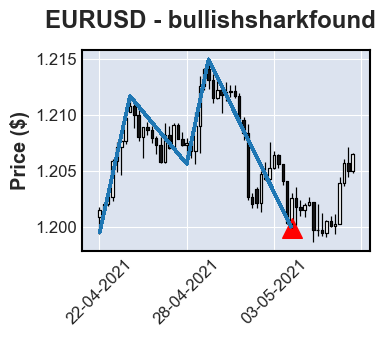

[16985, 16992, 17005, 17010, 17029] 17029


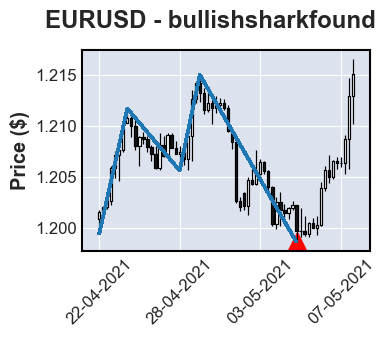

[16985, 16992, 17005, 17010, 17034] 17034
2
[2]


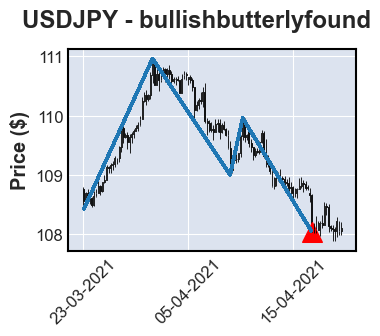

[16853, 16886, 16923, 16929, 16962] 16962


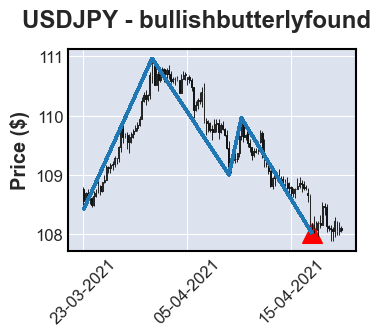

[16853, 16886, 16923, 16929, 16963] 16963


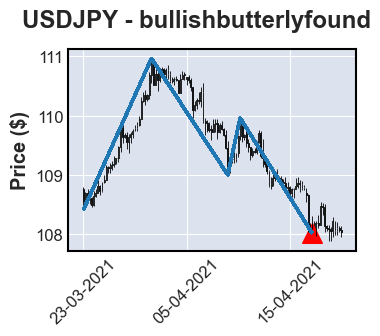

[16853, 16886, 16923, 16929, 16964] 16964


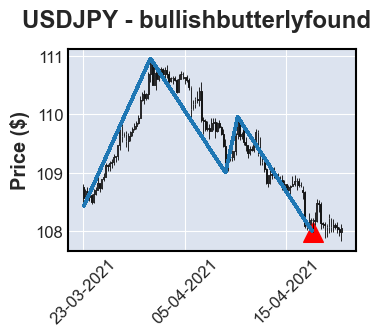

[16853, 16886, 16923, 16929, 16966] 16966


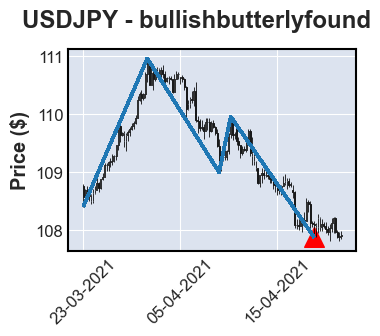

[16853, 16886, 16923, 16929, 16972] 16972


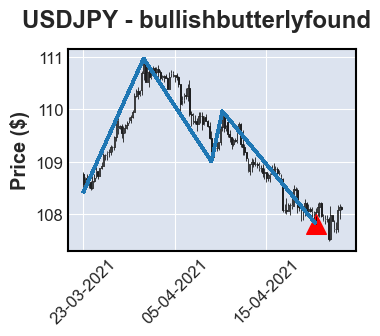

[16853, 16886, 16923, 16929, 16980] 16980


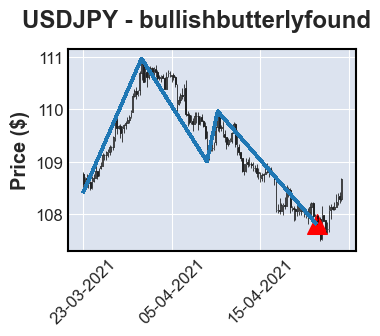

[16853, 16886, 16923, 16929, 16985] 16985


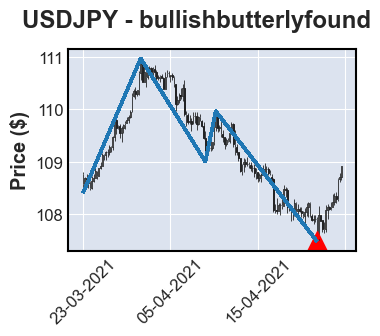

[16853, 16886, 16923, 16929, 16987] 16987
8
[8]
0
[0]
0
[0]


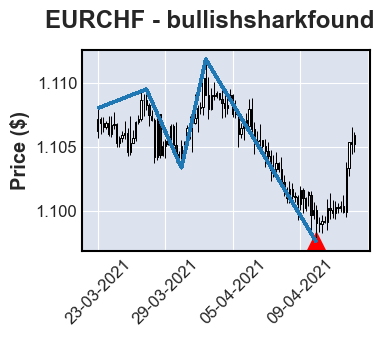

[16851, 16869, 16882, 16891, 16932] 16932
1
[1]
0
[0]
0
[0]
0
[0]
0
[0]
0
[0]
0
[0]
0
[0]


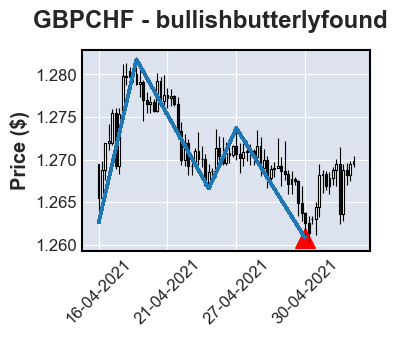

[16954, 16965, 16986, 16994, 17014] 17014


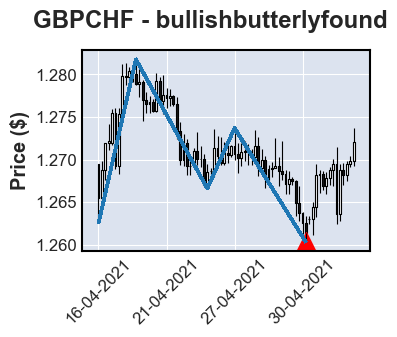

[16954, 16965, 16986, 16994, 17015] 17015
2
[2]
0
[0]
0
[0]
0
[0]
0
[0]


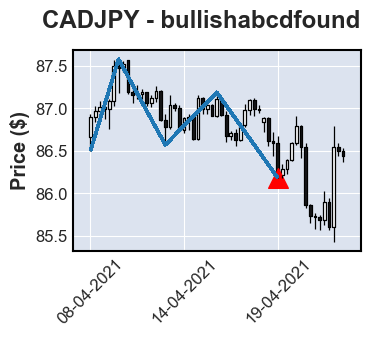

[16922, 16928, 16938, 16949, 16962] 16962


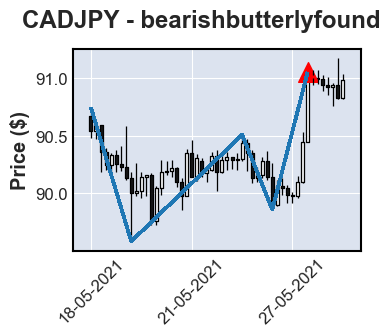

[17082, 17090, 17112, 17118, 17125] 17125


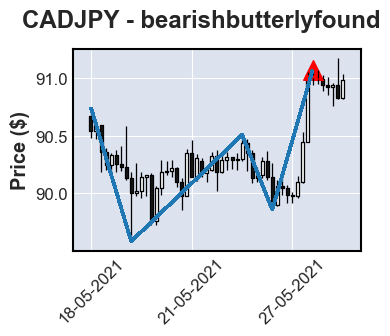

[17082, 17090, 17112, 17118, 17126] 17126


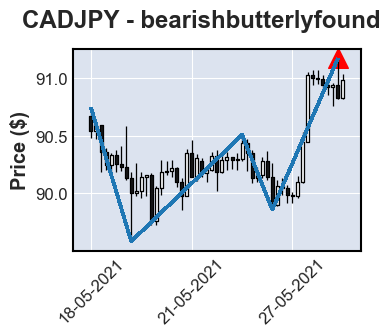

[17082, 17090, 17112, 17118, 17131] 17131
4
[4]


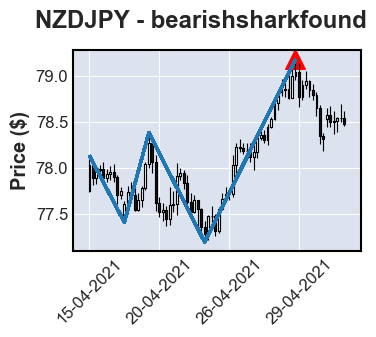

[16949, 16959, 16966, 16982, 17008] 17008
1
[1]
0
[0]
0
[0]
0
[0]
0
[0]
0
[0]
0
[0]


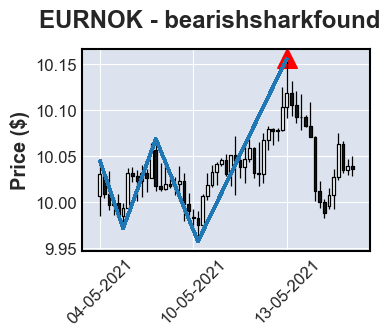

[17026, 17031, 17038, 17047, 17066] 17066
1
[1]
0
[0]
0
[0]


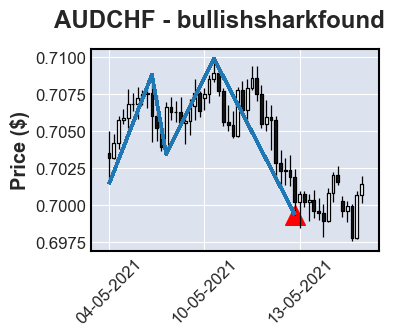

[17026, 17035, 17038, 17048, 17065] 17065


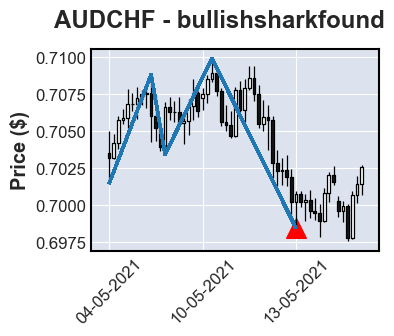

[17026, 17035, 17038, 17048, 17066] 17066


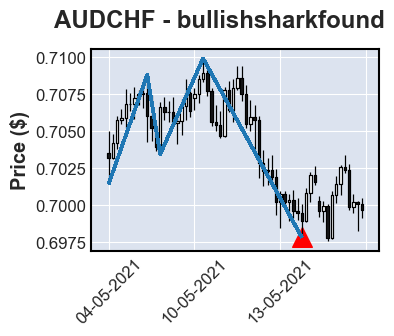

[17026, 17035, 17038, 17048, 17071] 17071


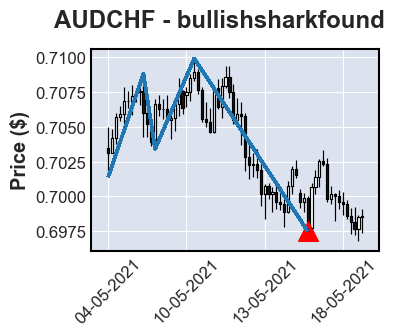

[17026, 17035, 17038, 17048, 17077] 17077
4
[4]


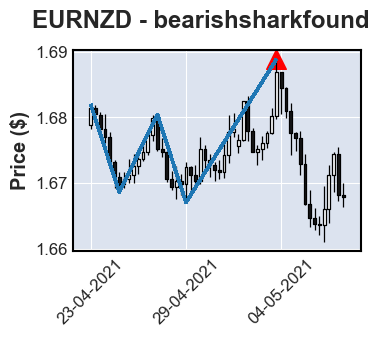

[16987, 16993, 17001, 17007, 17026] 17026
1
[1]
0
[0]


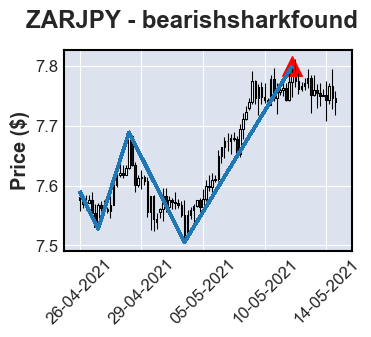

[16986, 16992, 17002, 17020, 17055] 17055


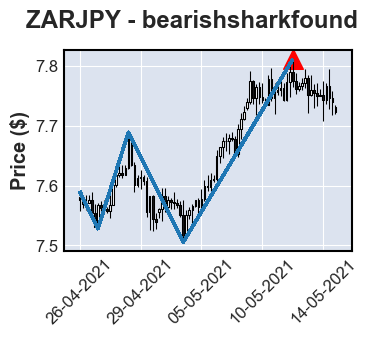

[16986, 16992, 17002, 17020, 17056] 17056
2
[2]
0
[0]
0
[0]
0
[0]


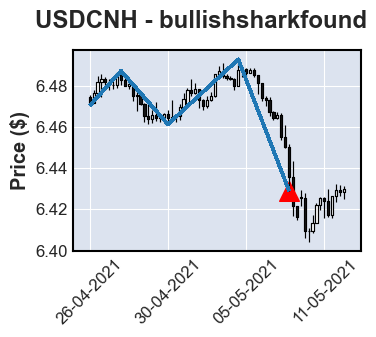

[13761, 13769, 13781, 13799, 13812] 13812
1
[1]
0
[0]
0
[0]
0
[0]


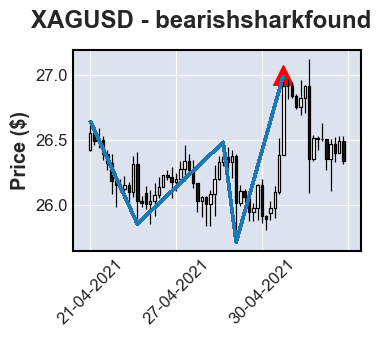

[16891, 16902, 16922, 16925, 16936] 16936


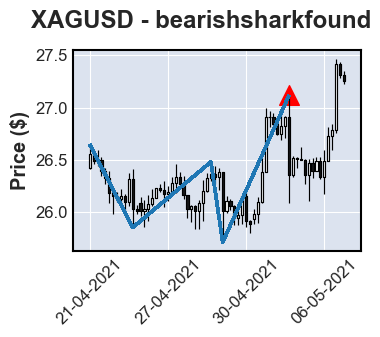

[16891, 16902, 16922, 16925, 16942] 16942
2
[2]
Wall time: 15h 46min 22s


In [21]:
%%time
#df_resultats = pd.DataFrame(index=['TimeFrame 1','TimeFrame2','Equity','Nbre Winners','Nbre Loosers','Average lenght of trade','Cumul pnl'])

#TICKERS = con.get_instruments()
#TICKERS = [ 'EUR/USD','USD/JPY','GBP/USD','USD/CHF','EUR/CHF','AUD/USD','USD/CAD','NZD/USD','EUR/GBP','EUR/JPY','GBP/JPY','CHF/JPY','GBP/CHF','EUR/AUD','EUR/CAD','AUD/CAD','AUD/JPY','CAD/JPY','NZD/JPY','GBP/CAD','GBP/NZD','GBP/AUD','AUD/NZD','USD/SEK','EUR/SEK','EUR/NOK','USD/NOK','USD/MXN','AUD/CHF','EUR/NZD','USD/ZAR','ZAR/JPY','NZD/CHF','CAD/CHF','NZD/CAD','USD/ILS','USD/CNH']

engine.say("קדימה")
engine.runAndWait()
j = 0
k = 0
err_allowed = 2/100
pips = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.ion()
position = 0
equity = 100000

#price = price.copy()

#price2 = price.copy()
#price3 = data3.copy()
_position = 0
_equity = 0
_nbtransactions = 0
backtest_graph = pd.DataFrame()
EQUITY = [_cash]
CASH = [_cash]
_winner = 0
_looser = 0
_index_entry = 0
TRADE_DURATION = []
_average_duration = 0
_size = 50000

PRICE_BUY = []
PRICE_SELL = []

_total = 0

_target = 0.0010
_sl = 0.030
_spread_filter = 0.00050
_filtre_multipoz = 0.1 # En %
_filtre_multipoz = _filtre_multipoz/100

_open_buy = 0
_open_sell = 0
_minipoz = 0

#MM21 = talib.EMA(price.Close, timeperiod=21)
#rsi = talib.RSI(price.Close, timeperiod=14)
rsi_high = 65
rsi_low = 35
#upperband, middleband, lowerband = talib.BBANDS(price.Close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
#fastk, fastd = talib.STOCHRSI(price.Close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)#STOCHASTICRSI
#slowk, slowd = talib.STOCH(price.High, price.Low, price.Close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)#STOCHASTIC

'''MM82 = talib.EMA(price2.Close, timeperiod=8)
MM212 = talib.EMA(price2.Close, timeperiod=21)
MM342 = talib.EMA(price2.Close, timeperiod=34)
rsi2 = talib.RSI(price2.Close, timeperiod=14)
upperband2, middleband2, lowerband2 = talib.BBANDS(price2.Close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
fastk2, fastd2 = talib.STOCHRSI(price2.Close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)#STOCHASTICRSI
slowk2, slowd2 = talib.STOCH(price2.High, price2.Low, price2.Close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
'''
'''MM83 = talib.EMA(price3.Close, timeperiod=8)
MM213 = talib.EMA(price3.Close, timeperiod=21)
MM343 = talib.EMA(price3.Close, timeperiod=34)
rsi3 = talib.RSI(price3.Close, timeperiod=14)
upperband3, middleband3, lowerband3 = talib.BBANDS(price3.Close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
fastk3, fastd3 = talib.STOCHRSI(price3.Close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)#STOCHASTICRSI
slowk3, slowd3 = talib.STOCH(price3.High, price3.Low, price3.Close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)'''

for x in TICKER_LIST:
    _ticker = x.replace('/','')
    df = joblib.load('BASES/'+_ticker+'_'+_period3)
    
    _grandcompteur =0
    MINICOMPTEUR = []


    _minicompteur = 0   
    price = df['Close']
    high = df['High']
    low = df['Low']
    rsi = talib.RSI(price, timeperiod=14)


    for i in range(len(price)-200,len(price)-1):

        # current_idx,current_pat,start,end = peak_detect(price.values[:i+1],low.values[:i+1],high.values[:i+1])
        current_idx,current_pat,start,end = peak_detect(high.values[:i+1],low.values[:i+1])

        XA = current_pat[1] - current_pat[0]
        AB = current_pat[2] - current_pat[1]
        BC = current_pat[3] - current_pat[2]
        CD = current_pat[4] - current_pat[3]


        moves=[XA,AB,BC,CD]

        gartley = is_gartley(moves,err_allowed)
        butterfly = is_butterfly(moves,err_allowed)
        crab = is_crab(moves,err_allowed)
        bat = is_bat(moves,err_allowed)
        shark = is_shark(moves,err_allowed)
        abcd = is_abcd(moves,err_allowed)

        current_rsi = [rsi.iloc[current_idx[0]],rsi.iloc[current_idx[1]],rsi.iloc[current_idx[2]],rsi.iloc[current_idx[3]],rsi.iloc[current_idx[4]]]
        current_rsi_max = max(current_rsi)
        current_rsi_min = min(current_rsi)
        delta_price = current_pat[4] - current_pat[2]
        delta_rsi = current_rsi[4] - current_rsi[2]


        harmonics = np.array([gartley,butterfly,bat,crab,shark,abcd])
        #harmonics = np.array([abcd])
        labels = ['gartley','butterly','bat','crab','shark','abcd']
        #labels = ['abcd']
        #if (np.any(harmonics==1) and delta_price<0 and delta_rsi>0) or (np.any(harmonics==-1) and delta_price>0 and delta_rsi<0):
        if np.any(harmonics==1) or np.any(harmonics==-1):

            for j in range(0, len(harmonics)):


                if harmonics[j]==1 or harmonics[j]==-1:
                    sense ='bearish' if harmonics[j]==-1 else 'bullish'
                    label =  sense + labels[j] +'found'
                    _minicompteur+=1


                    try:


                        blikouwach = [(df.index[current_idx[0]],current_pat[0]),(df.index[current_idx[1]],current_pat[1]),(df.index[current_idx[2]],current_pat[2])\
                                  ,(df.index[current_idx[3]],current_pat[3]),(df.index[current_idx[4]],current_pat[4])]
                        df['fulguropoing'] = np.where(df.index==df.index[current_idx[-1]],current_pat[-1],np.nan)
                        bloukblouk = fplt.make_addplot(df.iloc[start:i+15,:].fulguropoing.to_list(),type='scatter',markersize=200,marker='^',color='r')
                        fplt.plot(df.iloc[start:i+15,:], type='candle',title=_ticker+' - '+label,ylabel='Price ($)',figscale=0.5,  datetime_format='%d-%m-%Y',alines=blikouwach,addplot=bloukblouk)

                        print(current_idx,i)
                    except:
                        continue


    MINICOMPTEUR.append(_minicompteur)
    _grandcompteur+=_minicompteur
    print(_grandcompteur)
    print(MINICOMPTEUR)


In [68]:
_stop='2020-05-21'
_last='2020-06-21'

print(type(df.index))
df = df[(df.index >= _stop)&(df.index <=_last)]

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [24]:
df.index = pd.to_datetime(df.index)

In [33]:
#find extrema

err_allowed = 10/100
pips = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
#plt.ion()
price = price.Close.copy()

In [58]:
len(df_ATO)

2596

In [60]:
current_pat

array([299.33999634, 279.73001099, 285.76000977, 269.54000854,
       277.63000488])

In [63]:
df_H4.tail()

,Close,CloseAsk,CloseBid,High,HighAsk,HighBid,Low,LowAsk,LowBid,Open,OpenAsk,OpenBid,Symbol,Date
Lindex,,,,,,,,,,,,,,
2021-05-28 01:00:00,27.7650,27.786,27.744,27.9010,27.923,27.879,27.7240,27.745,27.703,27.8495,27.872,27.827,XAGUSD,2021-05-28
2021-05-28 05:00:00,27.7010,27.722,27.680,27.7655,27.787,27.744,27.5970,27.618,27.576,27.7650,27.786,27.744,XAGUSD,2021-05-28
2021-05-28 09:00:00,27.5525,27.574,27.531,27.7115,27.732,27.691,27.3980,27.418,27.378,27.7010,27.722,27.680,XAGUSD,2021-05-28
2021-05-28 13:00:00,27.9295,27.949,27.910,27.9295,27.949,27.910,27.4205,27.441,27.400,27.5525,27.574,27.531,XAGUSD,2021-05-28
2021-05-28 17:00:00,27.9375,27.969,27.906,27.9765,27.997,27.956,27.8065,27.827,27.786,27.9295,27.949,27.910,XAGUSD,2021-05-28
